In [1]:
import sys 
sys.path.append('../../../../../')
from plot_tools.fig_preamble import * # imports numpy, matplotlib, Py2PDF, plot_helper_funcs, plot_figstyle_sheet
import GPy

/home/riddhisw/anaconda2/lib/python2.7/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:
/home/riddhisw/anaconda2/lib/python2.7/site-packages/matplotlib/lines.py:1182: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markeredgecolor != ec:


In [2]:
ver=0
datapath = '../../../../DATA_v'+str(ver)+'_/' #v'+str(ver)+'/DATA_v'+str(ver)+'/'
datafile = 'GPR_kappa_demo2'
savefig2 = '../svg/paper_v0_'
figname2 = 'GPR_kappa_demo2'

In [3]:
# unpack data
data_object = np.load(datapath+datafile+'.npz')
datagen = data_object.iteritems()

for idx_ in xrange(len(data_object.files)):
    try:
        stored_item = datagen.next()
        print stored_item[0]
        vars()[stored_item[0]] = stored_item[1]    
    except StopIteration:
        pass

truth_list
true_freq
offsets
R_0
pred_list
n_train
sigma_0
n_testbefore
n_predict
periodicities
noise_variances


In [4]:
noiselabel= [r'Est. $(\sigma, R,l)$ ', r'Tuned $(\sigma, R, l)$.']

In [5]:
len(noise_variances)

2

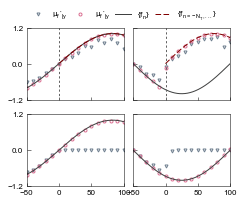

In [7]:
gs = gridspec.GridSpec(2, 2,
                       left=0.15, right=0.985, 
                       top=0.9, bottom=0.1, 
                       wspace=0.1, hspace=0.2)

fig2 = plt.figure(figsize=(cm2inch(8.6),cm2inch(7)))

FCOLOR = ['slategrey', 'palevioletred']#, 'lightsteelblue', 'thistle']
FSTY = ['v', 'o']
FACECOL = ['None', 'None' ]#, ':']
FLABELS = ['Perfect Learning', r'Imperfect Learning $p=n_T \quad p > n_T$']


for idx_freq in xrange(len(true_freq)): 
    
    for idx_per in xrange(len(periodicities)): 
        
        ax=0
        ax = fig2.add_subplot(gs[idx_per, idx_freq])       # noise variance are trajectories on a graph

        for idx_noise in xrange(len(noise_variances)): 
        
            # plot predictions n > 0
            ax.plot(range(-n_testbefore, n_predict, 10), 
                    pred_list[idx_freq, idx_per, idx_noise, :][::10], # thin out by plotting every 5th msmt
                    FSTY[idx_noise], 
                    markerfacecolor=FACECOL[idx_noise], 
                    markersize=3, 
                    markeredgecolor= FCOLOR[idx_noise], 
                    color= FCOLOR[idx_noise], 
                    lw= 1., 
                    markeredgewidth=1.,
                    label=r'$\mu_{f^*|y}$', alpha=1.)
        
        # plot the truth n > 0
        ax.plot(range(-n_testbefore, n_predict, 1), 
                truth_list[idx_freq, idx_per, idx_noise,n_train - n_testbefore : ], 
            '-', color=COLOURDICT['TRUTH'], lw=1.0, #markersize=1, 
            label=r'$ \{f_n \}$' )
        
        # plot the truth n = 0
        ax.plot(range(-offsets[idx_per], n_predict, 1), 
                truth_list[idx_freq, idx_per, idx_noise, 0:n_predict + offsets[idx_per]], 
                      '--', color='maroon', lw=1.0,#markersize=1, 
                      label=r'$ \{f_{n= -N_T,...} \} $' ) # offset is annoyingly a negative value.

        ax.axvline(x=-offsets[idx_per], ls=':', lw=1.0, 
                   color=COLOURDICT['DATA'])
        #ax.text(-offsets[idx_per] + 2, -0.8, r'$\kappa = $%s'%(np.round(-offsets[idx_per])))

        # Formatting
        if idx_per ==0: # top row
            ax.set(xticklabels=[])
        if idx_freq ==1: # second column
            ax.set(yticklabels=[])
        ax.set_ylim([-1.2, 1.2])
        ax.tick_params(direction='in', which='both')
        ax.yaxis.set_major_locator(ticker.LinearLocator(numticks=3))
        #ax.xaxis.set_major_locator(ticker.LinearLocator(numticks=3))
        ax = set_font_sizes(ax, fsize, Fsize)
        if idx_freq==0 and idx_per==0:
            ax.legend(loc=3,  fontsize=fsize, frameon=False, bbox_to_anchor=(0., 1.02, 2., .102), 
                     ncol=4, mode="expand", borderaxespad=0.)
            #ax.legend(loc=0, frameon=False)
            
        ax.set_xlim([-50, 100])
    
fig2.savefig(savefig2+figname2+'.svg', format='svg', dpi=my_dpi)
plt.show()
plt.close()